# **Import Module**

In [ ]:
# Import Library Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Import Library Sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# **Data Preparation**

In [ ]:
#Read Dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes_klasifikasi.csv to diabetes_klasifikasi (3).csv


In [ ]:
dataset = pd.read_csv("diabetes_klasifikasi.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Ukuran Dataset
print('Ukuran dataset:', dataset.shape)

Ukuran dataset: (768, 9)


# **EDA**

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


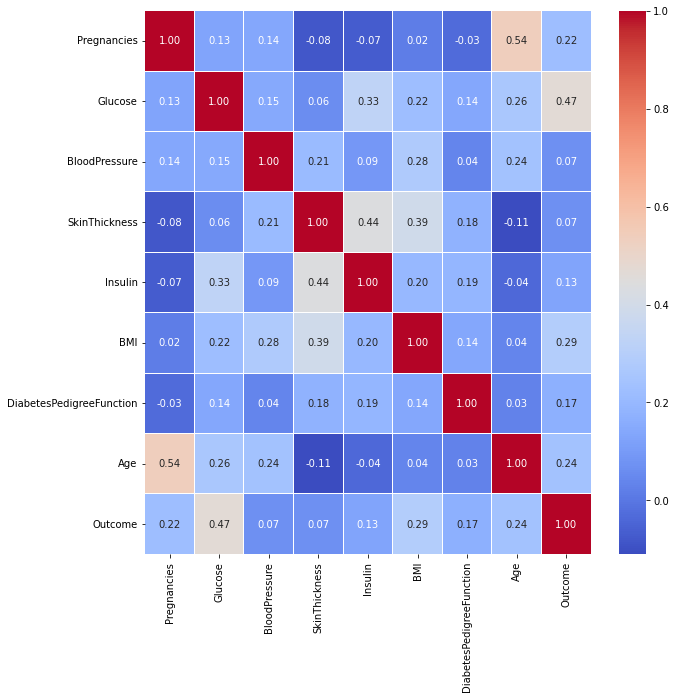

In [ ]:
# Uji korelasi atribut
f, ax = plt.subplots(figsize=(10, 10))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f', linewidths=.05)

In [ ]:
#Checking Target Imbalance
import plotly.graph_objects as go
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = dataset['Outcome'].value_counts()/dataset['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

In [ ]:
print('The number of missing value on dataset:')
dataset.isna().sum()

The number of missing value on dataset:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import plotly.express as px
# deteksi outlier menggunakan boxplot
def boxplot(fitur):
    figure = px.box(dataset, y = fitur)
    figure.show()
category = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for c in category:
    boxplot(c)

In [ ]:
data = dataset.iloc[:, :-1]
label = dataset['Outcome']

In [ ]:
# menghitung IQR untuk menghitung batas outlier
#Menghitung niai batas atas dan bawah dari tiap variabel di dataset numerik
upper_boundries = []
lower_boundries = []
for i in data: #for loop
  IQR = dataset[i].quantile(0.75) - dataset[i].quantile(0.25) #Menghitung nilai IQR
  lower_bound = dataset[i].quantile(0.25) - (1.5*IQR) #Menghitung nilai batas bawah
  lower_boundries.append(lower_bound)

  upper_bound = dataset[i].quantile(0.75) + (1.5*IQR) #Menghitung batas atas
  upper_boundries.append(upper_bound)
  
print('upper boundries :',upper_boundries)
print('lower bounries:' ,lower_boundries)

upper boundries : [13.5, 202.125, 107.0, 80.0, 318.125, 50.550000000000004, 1.2, 66.5]
lower bounries: [-6.5, 37.125, 35.0, -48.0, -190.875, 13.35, -0.32999999999999996, -1.5]


In [ ]:
j = 0
for i in data:
    dataset.loc[dataset[i] > upper_boundries[j], i] = int(upper_boundries[j])
    j = j + 1 

In [ ]:
j = 0
for i in data:
    dataset.loc[dataset[i] < lower_boundries[j], i] = int(lower_boundries[j])
    j = j + 1 

In [ ]:
def boxplot(fitur):
    figure = px.box(dataset, y = fitur)
    figure.show()
category = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for c in category:
    boxplot(c)

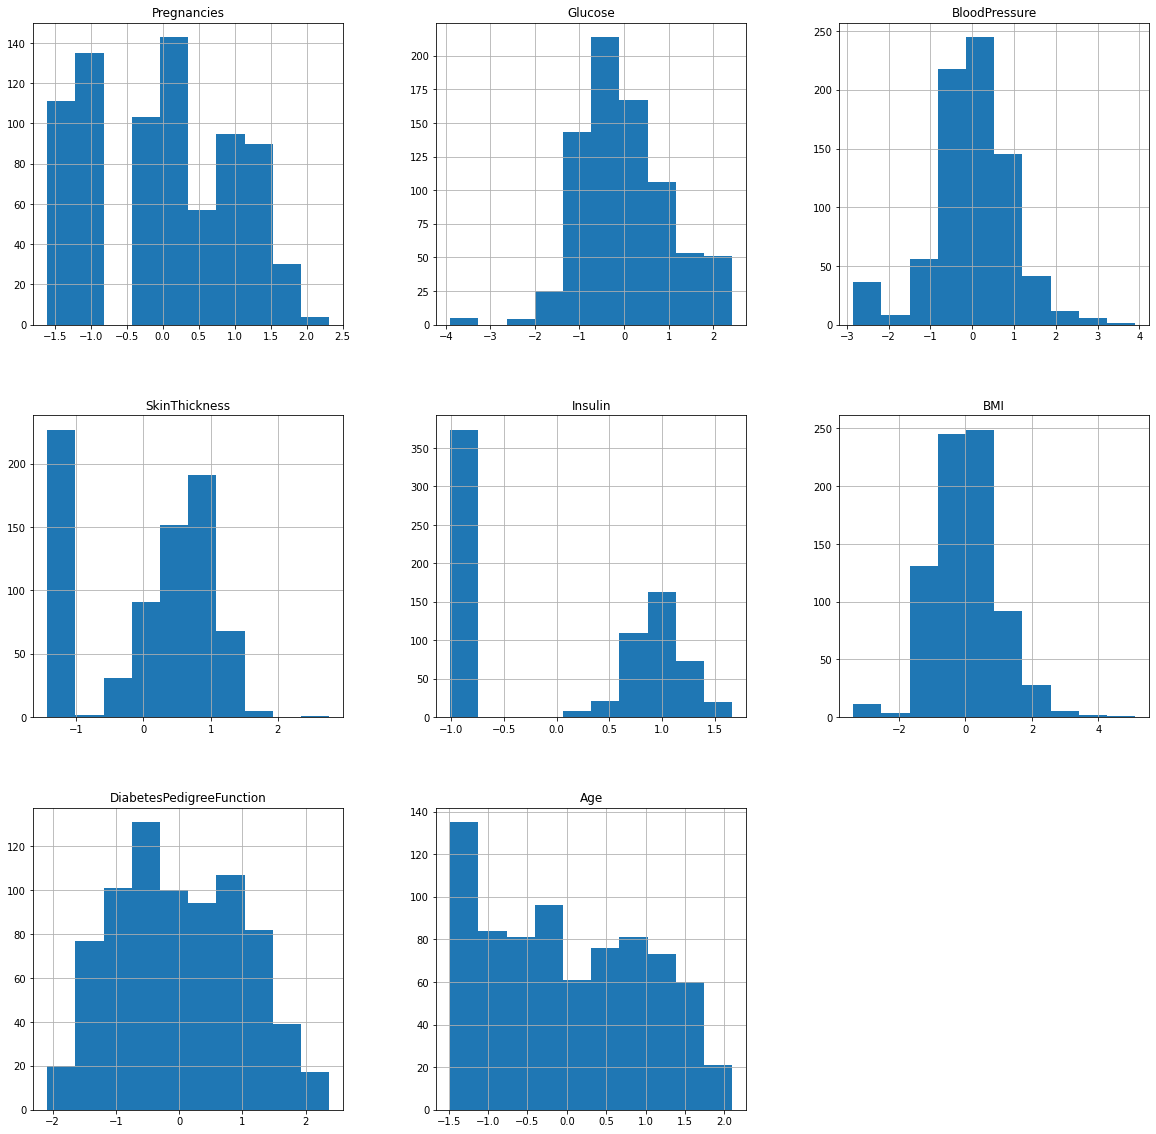

In [ ]:
# Power Transform
pt = PowerTransformer()
result = pt.fit_transform(data)
data = pd.DataFrame(data=result, columns=data.columns)
data.hist(figsize=(20,20));

In [ ]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(0.6)

x_sm, y_sm = smote.fit_resample(data,label)
y_sm.value_counts()

0    449
1    249
Name: Outcome, dtype: int64

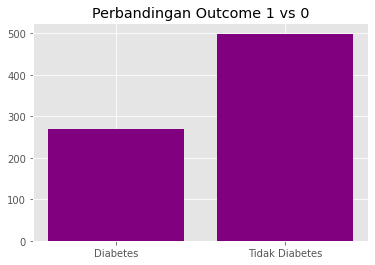

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

x = [0, 1]
y = [269, 499]

fig, ax = plt.subplots()

ax.bar(x, y, align='center', color = 'purple')

ax.set_title('Perbandingan Outcome 1 vs 0')

ax.set_xticks(x)
ax.set_xticklabels(("Diabetes", "Tidak Diabetes"))

plt.show()

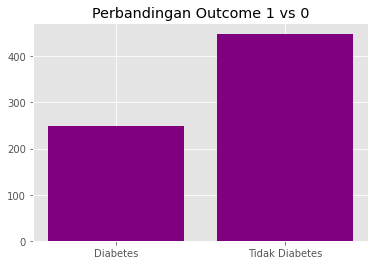

In [ ]:
from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')

x = [0, 1]
y = [249, 449]

fig, ax = plt.subplots()

ax.bar(x, y, align='center', color = 'purple')

ax.set_title('Perbandingan Outcome 1 vs 0')

ax.set_xticks(x)
ax.set_xticklabels(("Diabetes", "Tidak Diabetes"))

plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
n_input = x_train.shape[1]
n_output = len(np.unique(y_train))
print('Input Neuron:', n_input)
print('Output Neuron:', n_output)

Input Neuron: 8
Output Neuron: 2


# **LVQ Model**

In [ ]:
class LVQ(object):

    def __init__(self, sizeInput, sizeOutput, max_epoch, alpha=np.random.random(), threshold=np.random.random(), version='1'):
        """
        Inisialisasi class (constructor)
        :param sizeInput (int): Banyaknya input neuron sesuai dengan banyaknya parameter (fitur pada data latih)
        :param sizeOutput (int): Banyaknya output neuron sesuai dengan banyaknya label (kelas pada data latih)
        :param max_epoch (int): Maksimal epoch yang diizinkan
        :param alpha (float): learning rate
        :param threshold (float): nilai ambang batas
        :param version (string): versi dari jaringan LVQ. Bisa diisi dengan '1', '2', '2.1', '3'
        """

        self.sizeInput = sizeInput
        self.sizeOutput = sizeOutput
        self.max_epoch = max_epoch
        self.alpha = alpha
        self.threshold = threshold
        self.version = version
        self.weight = np.zeros((sizeOutput, sizeInput))

    def getWeight(self):
        """
        Mendapatkan bobot jaringan LVQ setelah proses training

        :return: weight (nilai bobot)
        """

        return self.weight

    def train(self,train_data,train_target):
        """
        Proses pelatihan jaringan LVQ
        :param train_data (numpy array atau pandas dataframe): Matriks yang berisi data latih
        :param train_target (numpy array atau pandas series): Array yang berisi label dari data latih
        :return: bobot dan label dari bobot
        """

        weight_label, label_index = np.unique(train_target, True)
        # print(weight_label)
        # print(label_index)
        # Inisialisasi bobot
        self.weight = train_data[label_index].astype(np.float)
        # Hapus data yang digunakan untuk inisialisasi bobot
        train_data = np.delete(train_data, label_index, axis=0)
        train_target = np.delete(train_target, label_index, axis=0)

        epoch = 0
        iterasi = 0
        while epoch <= self.max_epoch:
            epoch += 1
            # print('\nEpoch', epoch)
            for data, target in zip(train_data, train_target):
                iterasi += 1
                # print('Iterasi', iterasi)
                distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
                idx_min = np.argmin(distance)
                idx_sort = np.argsort(distance)
                idx_winner, idx_runnerUp = idx_sort[0], idx_sort[1]
                min_distance = min(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                max_distance = max(distance[idx_winner]/distance[idx_runnerUp], distance[idx_runnerUp]/distance[idx_winner])
                # print(distance, idx_sort)

                if self.version == '2':
                    if (
                        (weight_label[idx_winner] != weight_label[idx_runnerUp]) and
                        (target == weight_label[idx_runnerUp] and
                        (distance[idx_winner]/distance[idx_runnerUp] > 1-self.threshold and
                         distance[idx_runnerUp]/distance[idx_winner] < 1+self.threshold))
                    ):
                        self.weight[idx_winner] = self.weight[idx_winner] - self.alpha * (data - self.weight[idx_winner])
                        self.weight[idx_runnerUp] = self.weight[idx_runnerUp] + self.alpha * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                elif self.version == '2.1':
                    self.threshold = 0.35
                    if (
                        (target == weight_label[idx_winner] or target == weight_label[idx_runnerUp]) and
                        (min_distance > 1-self.threshold and max_distance < 1+self.threshold)
                    ):
                        self.weight[idx_winner] = self.weight[idx_winner] + self.alpha * (data - self.weight[idx_winner])
                        self.weight[idx_runnerUp] = self.weight[idx_runnerUp] - self.alpha * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                elif self.version == '3':
                    self.threshold = 0.2
                    m = np.random.uniform(0.1, 0.5)
                    beta = m * self.alpha
                    if (min_distance > (1-self.threshold) * (1+self.threshold)):
                        if (weight_label[idx_winner] != weight_label[idx_runnerUp]):
                            if (target == weight_label[idx_winner] or target == weight_label[idx_runnerUp]):
                                self.weight[idx_winner] = self.weight[idx_winner] + self.alpha * (data - self.weight[idx_winner])
                                self.weight[idx_runnerUp] = self.weight[idx_runnerUp] - self.alpha * (data - self.weight[idx_runnerUp])
                        else:
                            self.weight[idx_winner] = self.weight[idx_winner] + beta * (data - self.weight[idx_winner])
                            self.weight[idx_runnerUp] = self.weight[idx_runnerUp] + beta * (data - self.weight[idx_runnerUp])
                    else:
                        if target == weight_label[idx_min]:
                            self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                        else:
                            self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

                else:
                    if target == weight_label[idx_min]:
                        self.weight[idx_min] = self.weight[idx_min] + self.alpha * (data - self.weight[idx_min])
                    else:
                        self.weight[idx_min] = self.weight[idx_min] - self.alpha * (data - self.weight[idx_min])

            self.alpha = self.alpha * (1 - epoch / self.max_epoch)

        weight_class = (self.weight, weight_label)
        return weight_class

    def test(self, test_data, weight_class):
        """
        Proses pengujian jaringan LVQ
        :param test_data (numpy array atau pandas dataframe): Matriks yang berisi data uji
        :param weight_class (tuple): Tuple yang berisi pasangan bobot dan labelnya
        :return: Nilai prediksi label/class
        """

        weight, label = weight_class
        output = []
        for data in test_data:
            distance = np.sqrt(np.sum((data - self.weight) ** 2, axis=1))
            idx_min = np.argmin(distance)
            output.append(label[idx_min])

        return output

# **LVQ-ACO**

In [ ]:
q0 = 0.5
subset = 4
ants = 5 #jumlah semut
max_iter = 2 
phe = np.random.uniform(0.1,1,8)

for m in range(max_iter):
    #### Calculating the path for each ants
    path =[]
    for j in np.arange(ants):
        new_ph =np.copy(phe)
        cityA=[]
        A = np.random.randint(0,subset)
        cityA.append(A)
        for i in np.arange(subset-1):
            r = np.random.uniform(0,1) #kota yang akan dikunjungi selanjutnya       
            if r < q0:
                new_ph[A]=0
                A = np.argmax(new_ph)
                cityA.append(A)
            else:
                new_ph[A]=0
                prob = new_ph / (sum(new_ph))
                np.random.choice(range(8),p=prob)
                cityA.append(A)     
        path.append(cityA)


    accuracy=[]
    for k in np.arange(len(path)):
      lvq = LVQ(sizeInput=n_input, sizeOutput=n_output, max_epoch=50, version='3')
      bobot_dan_label = lvq.train(x_train, y_train)
      bobot = lvq.getWeight()
      y_pred = lvq.test(x_test, bobot_dan_label)
      acc = accuracy_score(y_test, y_pred)
      accuracy.append(acc)
    max_acc = np.max(accuracy)   
    max_acc_ind = np.argmax(accuracy)
    best_atts = path[max_acc_ind]

    phe = phe* 0.8
    for l in np.arange(len(best_atts)):
        q= (phe[best_atts[l]]*1.2) / 0.8
        phe[best_atts[l]] =q 
    final_Attribtes = ((np.argsort(phe).tolist())[::-1])[:subset]

print('phe :', phe)
print('path:', path)
print("The Best Attributes are:",final_Attribtes)
print("The Best accuracy is:",max_acc*100)

phe : [0.87801885 5.50802342 0.29107022 0.13257659 0.23716349 0.14901808
 0.54862732 0.17673368]
path: [[2, 1, 1, 0], [1, 1, 0, 0], [3, 3, 1, 0], [1, 1, 1, 0], [1, 1, 1, 0]]
The Best Attributes are: [1, 0, 6, 2]
The Best accuracy is: 75.0


In [ ]:
y_pred_test = lvq.test(x_test, bobot_dan_label)
#print('Label Pred: ', y_pred)
#print('Label True: ', y_test)
print('Accuracy data test:', accuracy_score(y_test, y_pred_test))

Accuracy data test: 0.75


In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        90
           1       0.64      0.68      0.66        50

    accuracy                           0.75       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.75      0.75      0.75       140



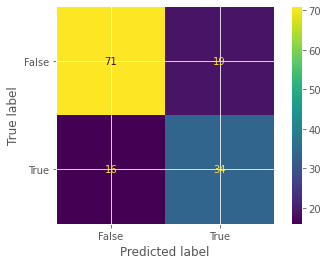

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()